Thanks to https://github.com/DataScienceRoadMapDSRM <br>
for hosting datasets on their github repo for users to access easily <br>

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk

nltk.download('punkt')
nltk.download('stopwords')


data = pd.read_csv(r'https://raw.githubusercontent.com/DataScienceRoadMapDSRM/Tableau-Dashboards-info/main/netflix_titles.csv')
data.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\srika\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\srika\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                       NaN   
2                       NaN   
3                       NaN   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country         date_added  release_year  \
0  United States, India, South Korea, China  September 9, 2019          2019   
1                            United Kingdom  September 9, 2016          2016   
2                             United States  September 8, 2018          2013   
3                             United States  September 8, 2018          2016   
4                             United States  September 8, 2017          2017   

     rating  duration                           listed_in  \
0     TV-PG    90 min  Children & Family Movies, Comedies   
1     TV-MA    94 min                     Stand-Up Comedy   
2  TV-Y7-FV  1 Season                            Kids' TV   
3     TV-Y7  1 Season                            Kids' TV   
4     TV-14    99 min                            Comedies   

                                         description  
0  Before planning an awesome wedding for his gra...  
1  Jandino Asporaat riffs on the challenges of ra...  
2  With the help of three human allies, the Autob...  
3  When a prison ship crash unleashes hundreds of...  
4  When nerdy high schooler Dani finally attracts...

In [42]:
data.describe(include='all').T

count unique  \
show_id       6234.0    NaN   
type            6234      2   
title           6234   6172   
director        4265   3301   
cast            5664   5469   
country         5758    554   
date_added      6223   1524   
release_year  6234.0    NaN   
rating          6224     14   
duration        6234    201   
listed_in       6234    461   
description     6234   6226   

                                                            top  freq  \
show_id                                                     NaN   NaN   
type                                                      Movie  4265   
title                                               The Silence     3   
director                                 Raúl Campos, Jan Suter    18   
cast                                         David Attenborough    18   
country                                           United States  2032   
date_added                                      January 1, 2020   122   
release_year                                                NaN   NaN   
rating                                                    TV-MA  2027   
duration                                               1 Season  1321   
listed_in                                         Documentaries   299   
description   A surly septuagenarian gets another chance at ...     3   

                         mean              std       min          25%  \
show_id       76703679.319859  10942964.649885  247747.0  80035801.75   
type                      NaN              NaN       NaN          NaN   
title                     NaN              NaN       NaN          NaN   
director                  NaN              NaN       NaN          NaN   
cast                      NaN              NaN       NaN          NaN   
country                   NaN              NaN       NaN          NaN   
date_added                NaN              NaN       NaN          NaN   
release_year       2013.35932          8.81162    1925.0       2013.0   
rating                    NaN              NaN       NaN          NaN   
duration                  NaN              NaN       NaN          NaN   
listed_in                 NaN              NaN       NaN          NaN   
description               NaN              NaN       NaN          NaN   

                     50%          75%         max  
show_id       80163367.0  80244888.75  81235729.0  
type                 NaN          NaN         NaN  
title                NaN          NaN         NaN  
director             NaN          NaN         NaN  
cast                 NaN          NaN         NaN  
country              NaN          NaN         NaN  
date_added           NaN          NaN         NaN  
release_year      2016.0       2018.0      2020.0  
rating               NaN          NaN         NaN  
duration             NaN          NaN         NaN  
listed_in            NaN          NaN         NaN  
description          NaN          NaN         NaN

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [44]:
data.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [45]:
# missing director wont a problem. Hence replaacing it with unknown
data['director'] = data['director'].fillna('unknown')

# Similarly cast & country will be unknown as well
data['cast'] = data['cast'].fillna('unknown')
data['country'] = data['country'].fillna('unknown')

# missing rating & date can be dropped
data['rating'] = data['rating'].dropna()
data['date_added'] = data['date_added'].dropna()

# dropping unnecessary columns
data.drop(['show_id'], axis=1, inplace=True)

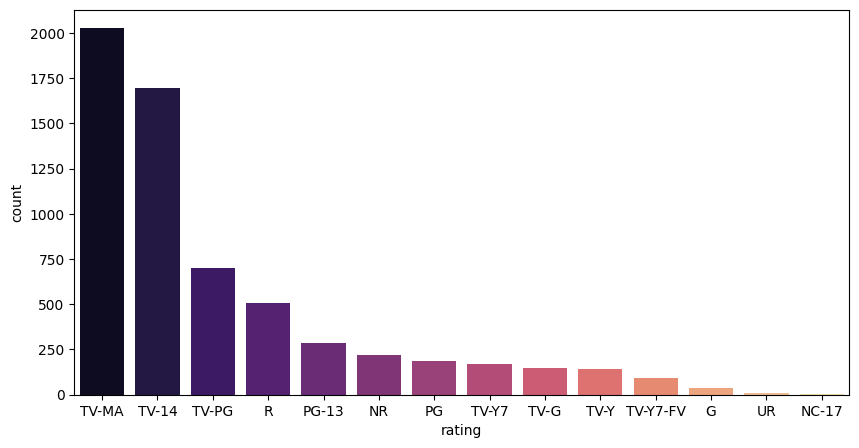

In [46]:
# Exploratory Data Analysis

count_rating = data['rating'].value_counts()
count_rating = count_rating.reset_index()
count_rating.columns = ['rating', 'count']
plt.figure(figsize=(10, 5))
sns.barplot(x='rating', y='count', data=count_rating, order=count_rating['rating'], palette='magma', hue = 'rating')
plt.show()

([<matplotlib.patches.Wedge at 0x1b747e7b110>,
 [Text(-1.4652190715471538, -0.9568871784983308, 'Movie'),
  Text(1.3814923519295403, 0.9022077818109236, 'TV Show')],
 [Text(-0.8372680408840879, -0.5467926734276176, '68.4%'),
  Text(0.7535412828706582, 0.49211333553323094, '31.6%')])

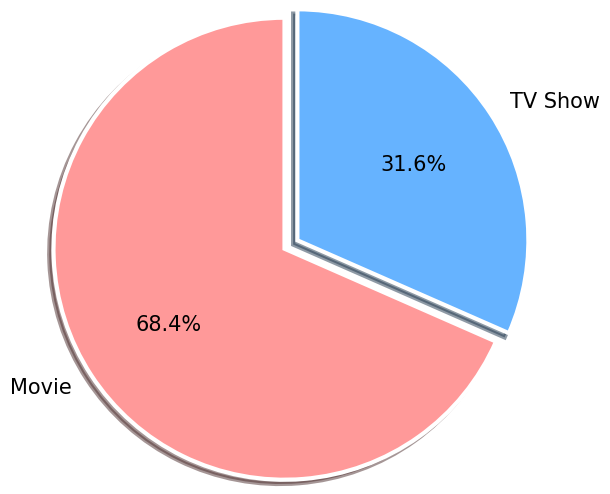

In [47]:
# Pie chart
count_type = data['type'].value_counts()
count_type = count_type.reset_index()
count_type.columns = ['type', 'count']
plt.figure(figsize=(10, 5))
plt.pie(count_type['count'], labels = count_type['type'], autopct='%1.1f%%', shadow=True, startangle=90, explode=(0.1,0), colors=['#ff9999', '#66b3ff'], textprops={'fontsize': 15}, radius=1.5, wedgeprops={'linewidth': 3, 'edgecolor': 'white'})

In [48]:
data.head()

type                                    title                  director  \
0    Movie  Norm of the North: King Sized Adventure  Richard Finn, Tim Maltby   
1    Movie               Jandino: Whatever it Takes                   unknown   
2  TV Show                       Transformers Prime                   unknown   
3  TV Show         Transformers: Robots in Disguise                   unknown   
4    Movie                             #realityhigh          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country         date_added  release_year  \
0  United States, India, South Korea, China  September 9, 2019          2019   
1                            United Kingdom  September 9, 2016          2016   
2                             United States  September 8, 2018          2013   
3                             United States  September 8, 2018          2016   
4                             United States  September 8, 2017          2017   

     rating  duration                           listed_in  \
0     TV-PG    90 min  Children & Family Movies, Comedies   
1     TV-MA    94 min                     Stand-Up Comedy   
2  TV-Y7-FV  1 Season                            Kids' TV   
3     TV-Y7  1 Season                            Kids' TV   
4     TV-14    99 min                            Comedies   

                                         description  
0  Before planning an awesome wedding for his gra...  
1  Jandino Asporaat riffs on the challenges of ra...  
2  With the help of three human allies, the Autob...  
3  When a prison ship crash unleashes hundreds of...  
4  When nerdy high schooler Dani finally attracts...

In [49]:
data['date_added'] = pd.DatetimeIndex(data['date_added'])
data['year_added'] = data['date_added'].dt.year
data['month_added'] = data['date_added'].dt.month

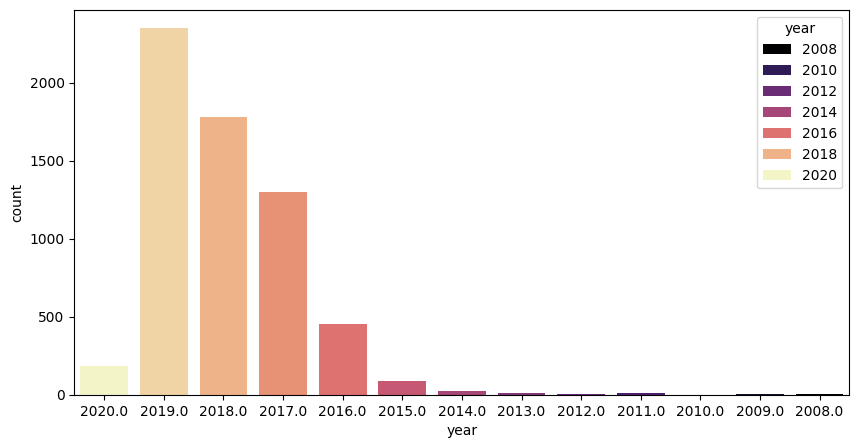

In [50]:
date_year = data['year_added'].value_counts()
date_year = date_year.reset_index()
date_year.columns = ['year', 'count']
date_year.sort_values('year', inplace=True, ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x='year', y='count', data=date_year, order=date_year['year'], palette='magma', hue = 'year')
plt.show()

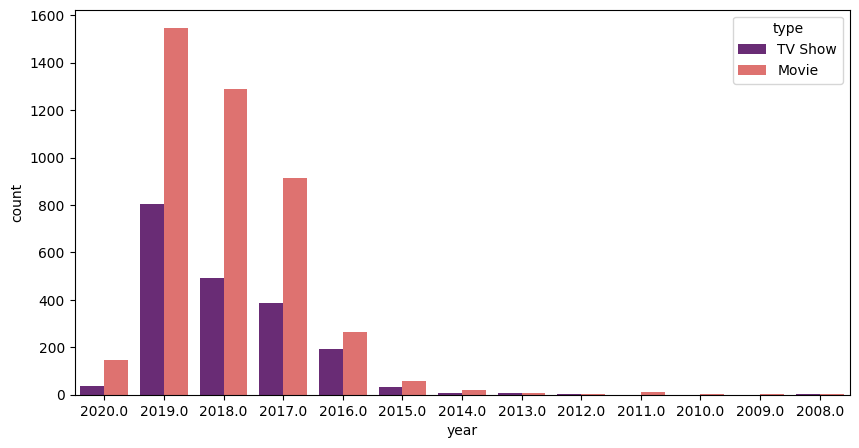

In [51]:
date_year_type = data.groupby(['year_added', 'type']).size().reset_index()
date_year_type.columns = ['year', 'type', 'count']
date_year_type.sort_values('year', inplace=True, ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x='year', y='count', data=date_year_type, order=date_year_type['year'], palette='magma', hue = 'type')
plt.show()

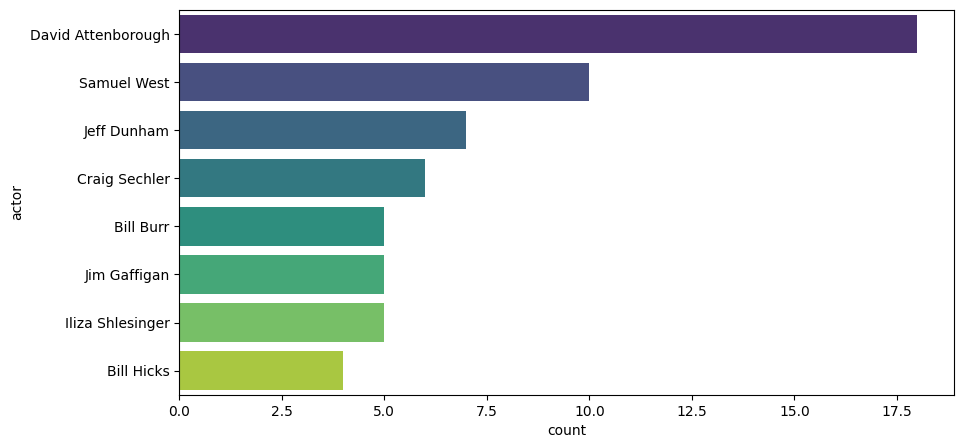

In [52]:
# top actors in terms of content
top_actors = data['cast'].value_counts().head(9)
top_actors = top_actors.reset_index()
top_actors.columns = ['actor', 'count']
top_actors.drop(index=0, axis=0, inplace=True)
plt.figure(figsize=(10, 5))
sns.barplot(x='count', y='actor', data=top_actors, order=top_actors['actor'], palette='viridis', hue = 'actor')
plt.show()

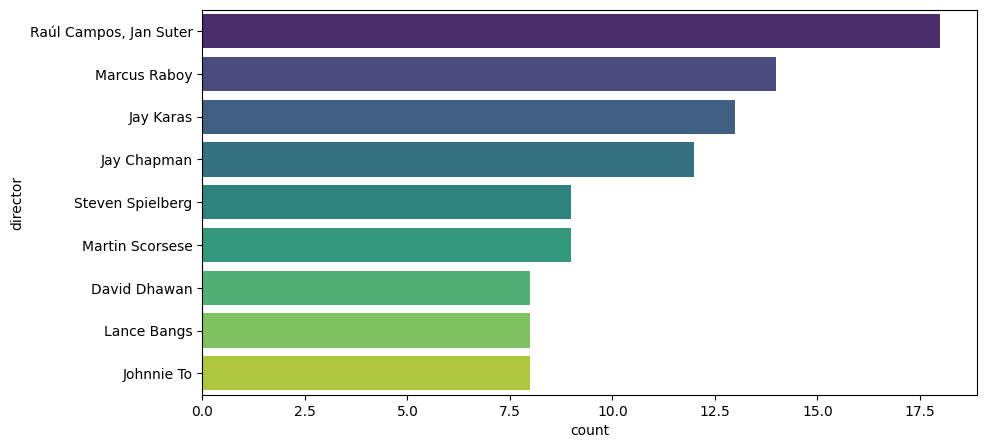

In [53]:
# top directors in terms of content
top_directors = data['director'].value_counts().head(10)
top_directors = top_directors.reset_index()
top_directors.columns = ['director', 'count']
top_directors.drop(index=0, axis=0, inplace=True)
plt.figure(figsize=(10, 5))
sns.barplot(x='count', y='director', data=top_directors, order=top_directors['director'], palette='viridis', hue = 'director')
plt.show()

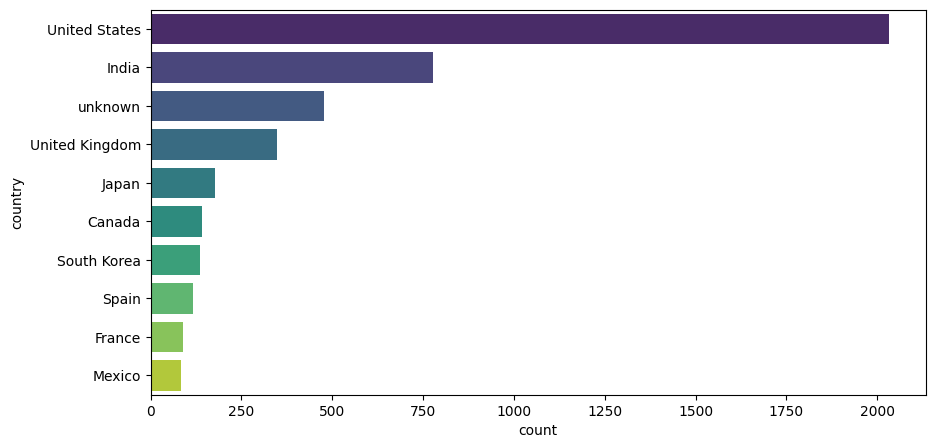

In [54]:
# top countries in terms of content
top_countries = data['country'].value_counts().head(10)
top_countries = top_countries.reset_index()
top_countries.columns = ['country', 'count']
plt.figure(figsize=(10, 5))
sns.barplot(x='count', y='country', data=top_countries, order=top_countries['country'], palette='viridis', hue = 'country')
plt.show()

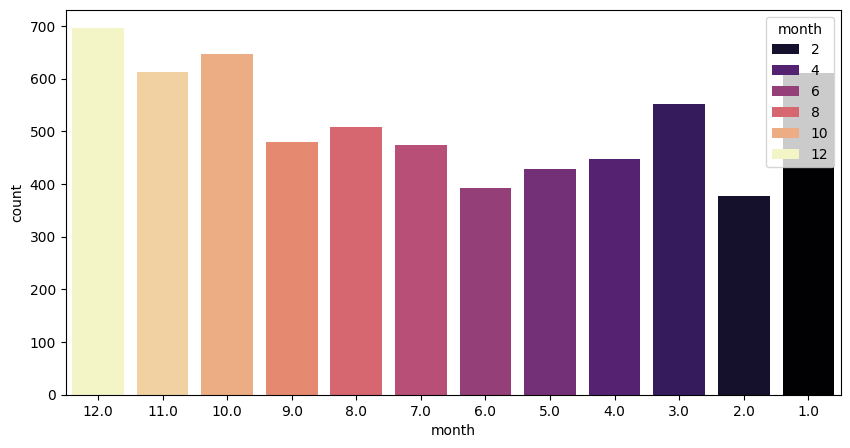

In [55]:
month_year = data['month_added'].value_counts()
month_year = month_year.reset_index()
month_year.columns = ['month', 'count']
month_year.sort_values('month', inplace=True, ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x='month', y='count', data=month_year, order=month_year['month'], palette='magma', hue = 'month')
plt.show() 

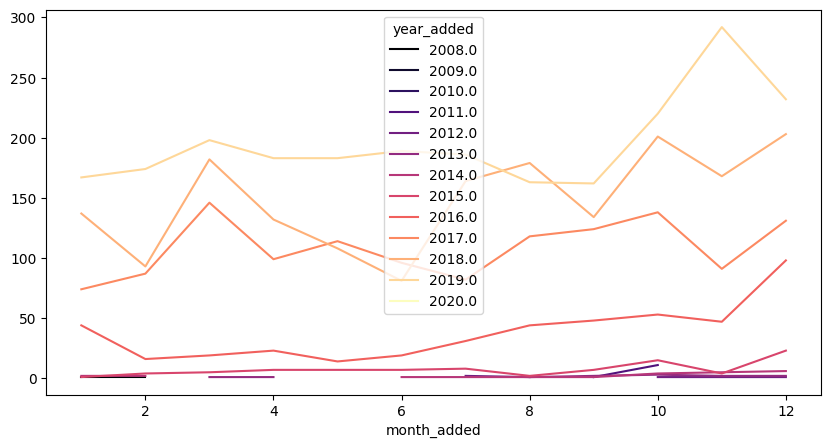

In [56]:
month_year = data.groupby(['month_added', 'year_added']).size().reset_index()
month_year.pivot(index='month_added', columns='year_added', values=0).plot(figsize=(10, 5), cmap='magma')
plt.show()

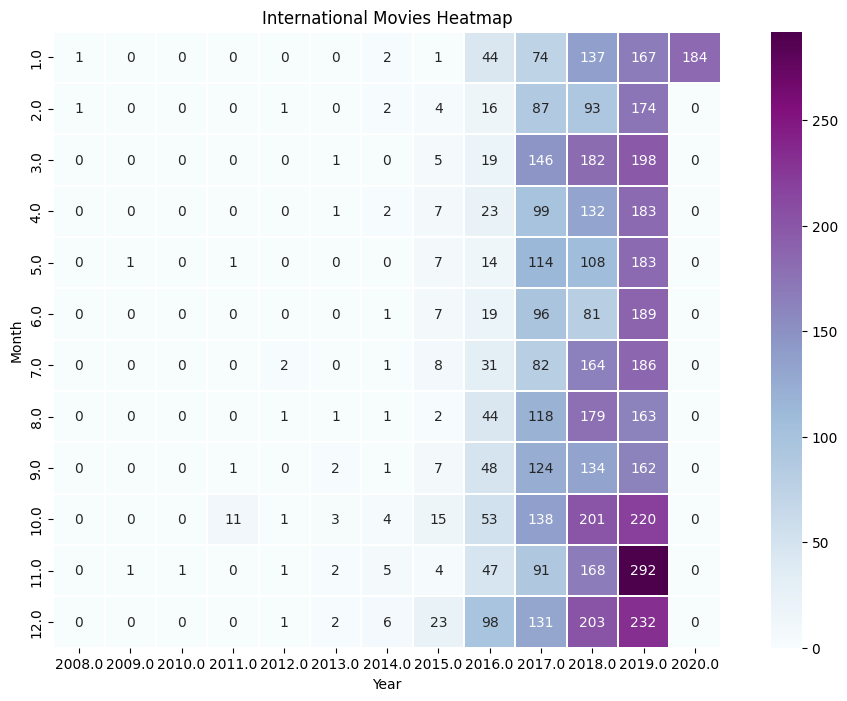

In [57]:
int_month_year = data.groupby('year_added')['month_added'].value_counts().unstack().fillna(0).T

fig, ax = plt.subplots(figsize=(13, 8))
sns.heatmap(int_month_year, linewidths=0.025, cmap="BuPu", square=True,annot=True, fmt='.0f')
plt.title("International Movies Heatmap")
plt.ylabel("Month")
plt.xlabel("Year")
plt.show()

In [58]:
# nltk for identifying the keywords related to each type of rating
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

data['rating'] = data['rating'].str.lower()
data['keywords'] = data['cast'] + ' ' + data['director'] + ' ' + data['listed_in']

data['keywords'] = data['keywords'].apply(lambda x: word_tokenize(x))

data['keywords'] = data['keywords'].apply(lambda x: [word for word in x if word not in stopwords.words('english')])

data['keywords'] = data['keywords'].apply(lambda x: ' '.join(x))

data['keywords'] = data['keywords'].apply(lambda x: x.lower())
data['keywords'] = data['keywords'].apply(lambda x: x.replace(',', ' '))
data['keywords'] = data['keywords'].apply(lambda x: x.replace('.', ' '))
data['keywords'] = data['keywords'].apply(lambda x: x.replace('(', ' '))
data['keywords'] = data['keywords'].apply(lambda x: x.replace(')', ' '))
data['keywords'] = data['keywords'].apply(lambda x: x.replace(':', ' '))


In [59]:
rating_keywords = data[['rating', 'keywords']]
rating_keywords.head(5)

rating                                           keywords
0     tv-pg  alan marriott   andrew toth   brian dobson   c...
1     tv-ma           jandino asporaat unknown stand-up comedy
2  tv-y7-fv  peter cullen   sumalee montano   frank welker ...
3     tv-y7  will friedle   darren criss   constance zimmer...
4     tv-14  nesta cooper   kate walsh   john michael higgi...

In [60]:
def preprocess_keywords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() != 'unknown']
    return ' '.join(sorted(set(filtered_words), key=words.index))

# Apply the function to the 'keywords' column
rating_keywords['keywords'] = rating_keywords['keywords'].apply(preprocess_keywords)

C:\Users\srika\AppData\Local\Temp\ipykernel_3828\930280143.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_keywords['keywords'] = rating_keywords['keywords'].apply(preprocess_keywords)


In [61]:
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(rating_keywords['keywords'])
tfidf_matrix.shape

(6234, 27363)

In [62]:
feature_names = tfidf.get_feature_names_out()
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)
tfidf_df['rating'] = rating_keywords['rating']
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
cosine_sim.shape

(6234, 6234)

In [63]:
rating_keywords = rating_keywords.dropna(subset=['rating'])

In [64]:
def create_word_cloud(grouped_data, rating):
    # Ensure 'rating' is indeed an index in grouped_data
    if rating in grouped_data.index:
        data = grouped_data.loc[rating]
        
        # Generate a word cloud
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(data)

        # Plot
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud for Rating: {rating}')
        plt.show()
    else:
        print(f'Rating {rating} not found in grouped data.')




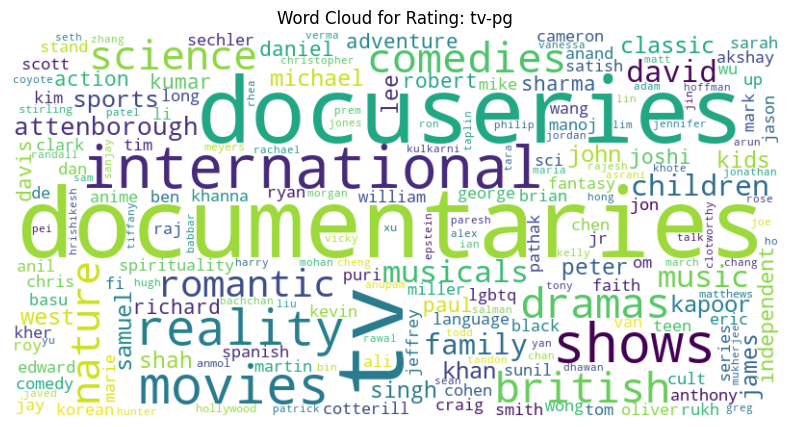

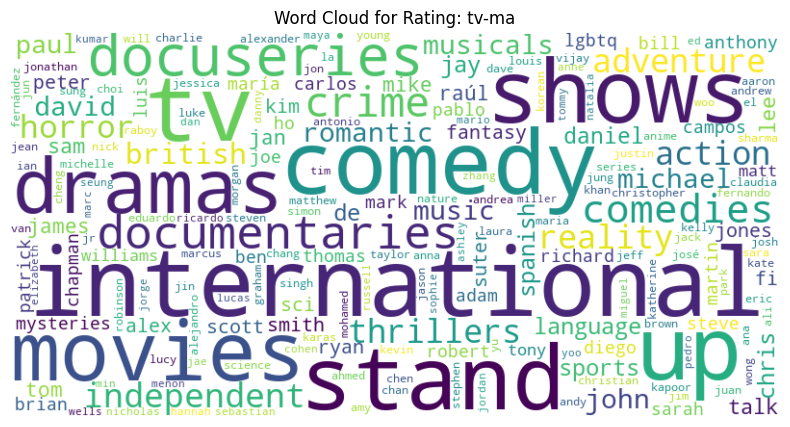

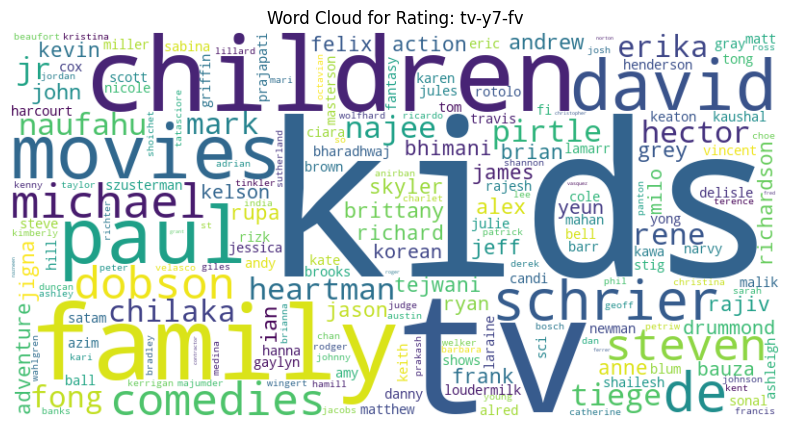

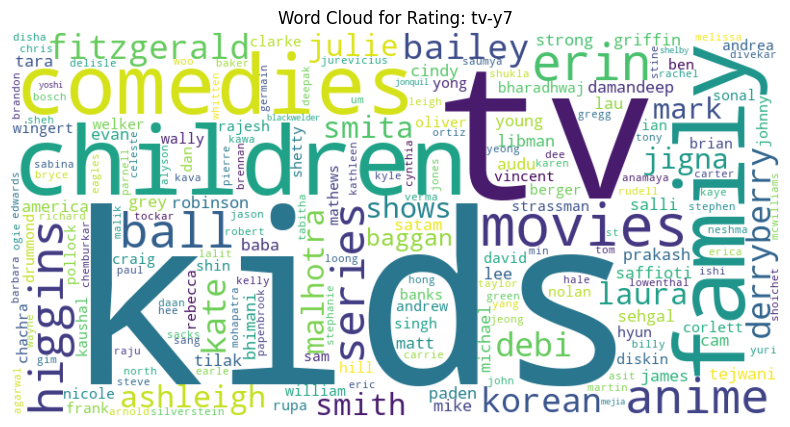

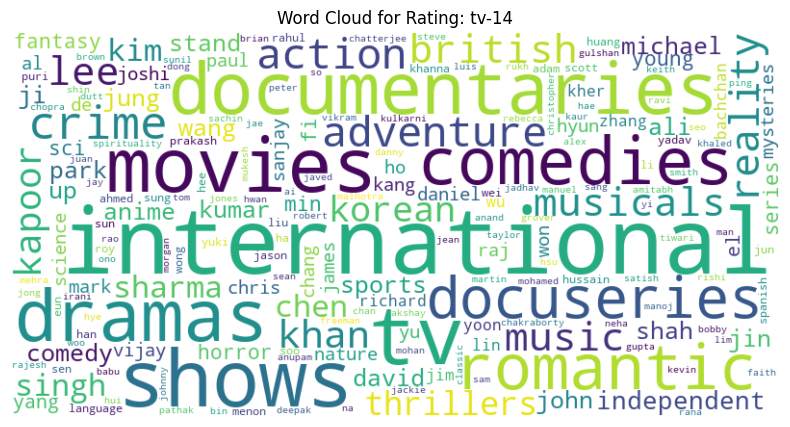

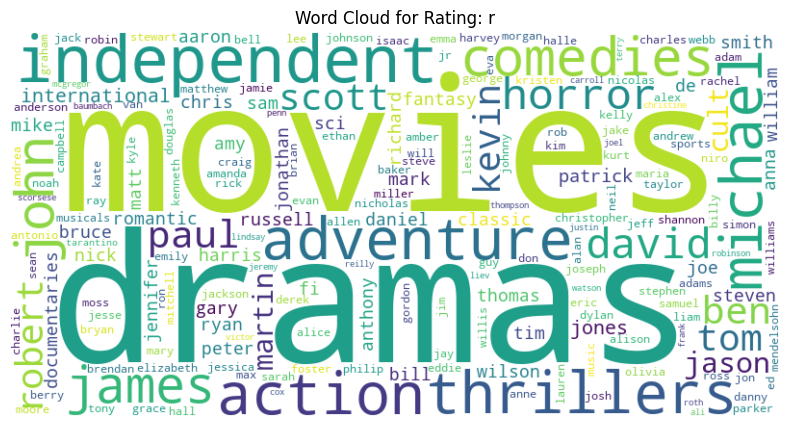

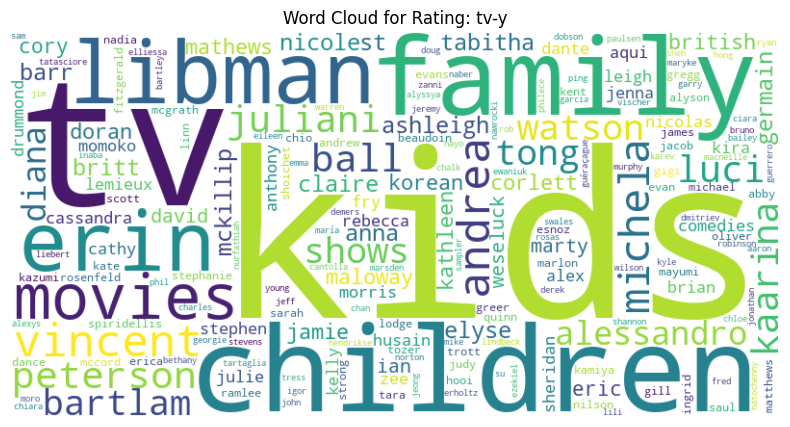

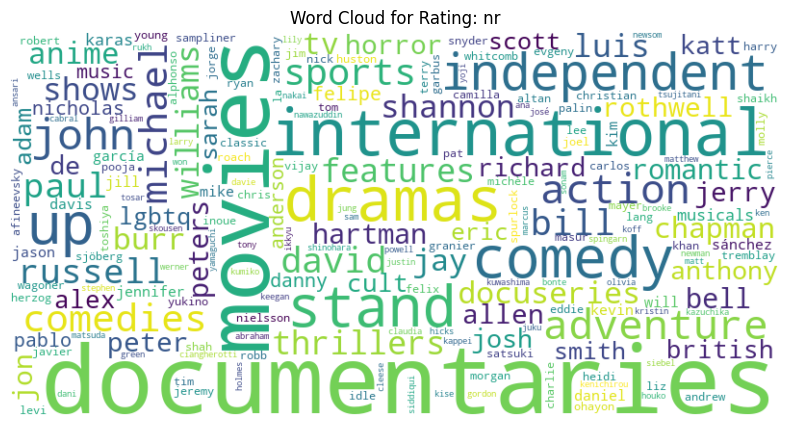

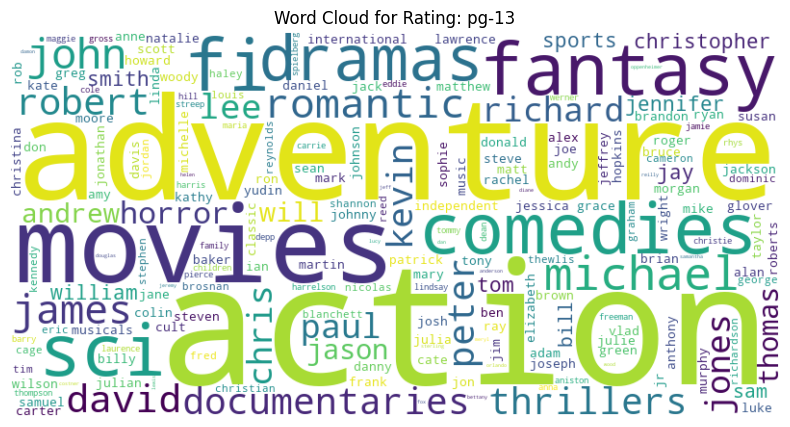

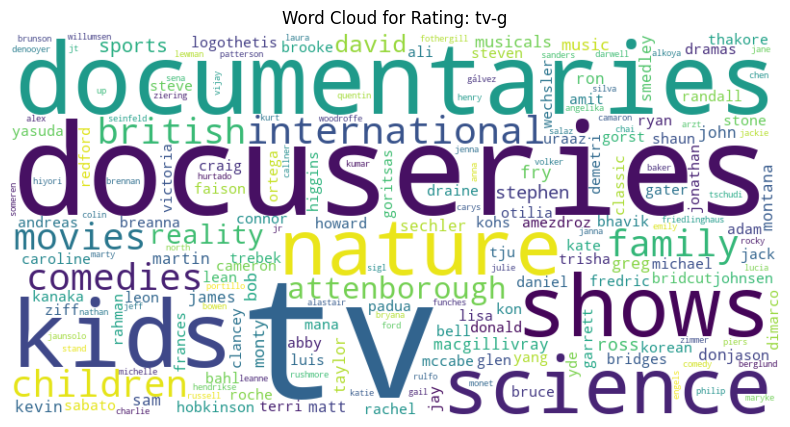

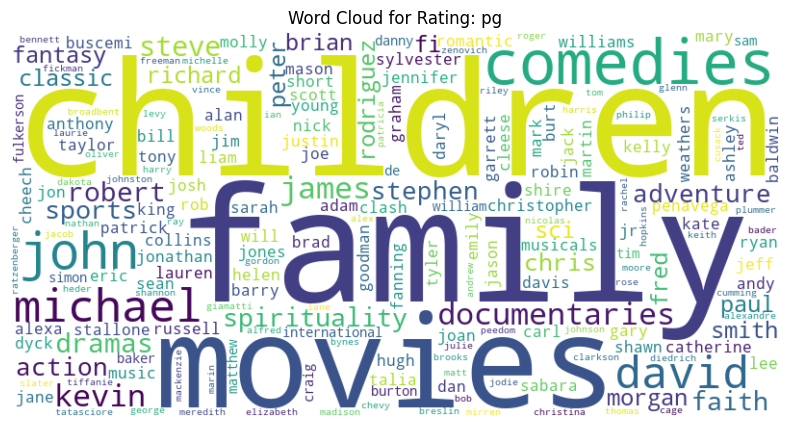

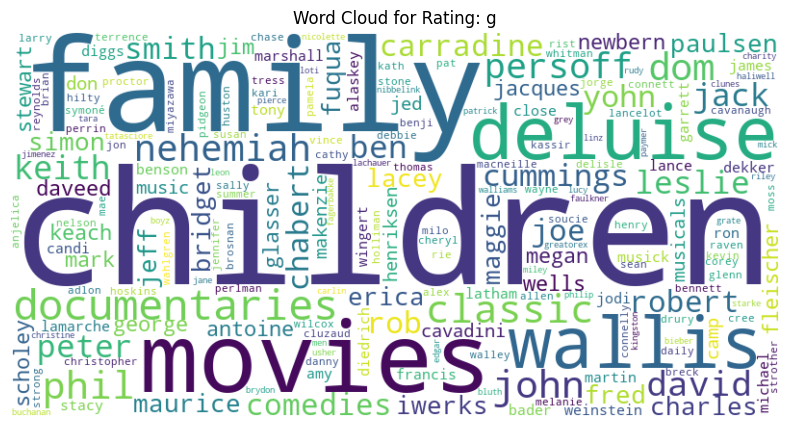

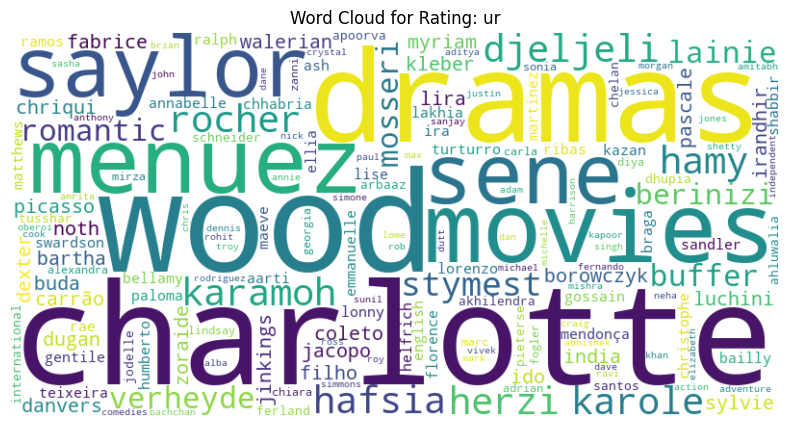

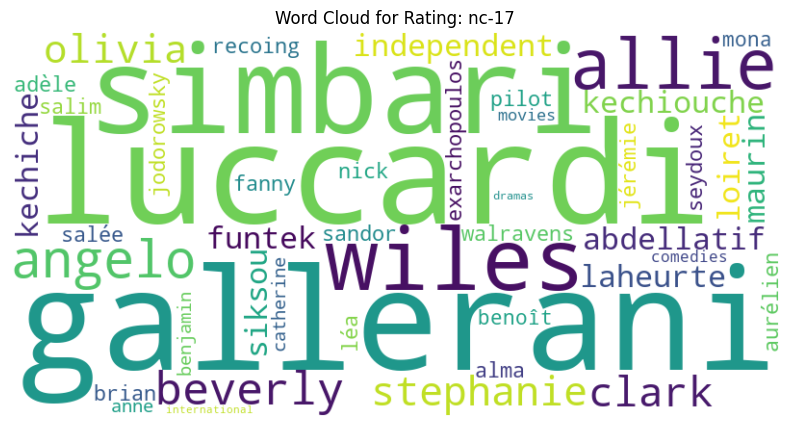

In [65]:
grouped_data = tfidf_df.groupby('rating').sum()

for i in rating_keywords['rating'].unique():
    create_word_cloud(grouped_data, i)
    